In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes.csv',header=0,sep=',')
df.columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(df.shape)
df.isnull().sum()

(768, 9)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
(df == 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

#### SkinThickness and Insulin columns have a lot of invalid points (0 values)
#### So we will remove only the rows which the “BloodPressure”, “BMI” and “Glucose” are zero

In [6]:
df_mod = df[(df.BloodPressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]
df_mod.head()
(df_mod == 0).sum(axis=0)

Pregnancies                  99
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     475
dtype: int64

### we are going to predict the Outcome
#### 0 means No diabetes
#### 1 means diabetes

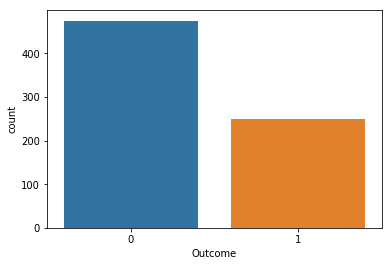

In [7]:
sns.countplot(df_mod['Outcome'],label="Count")

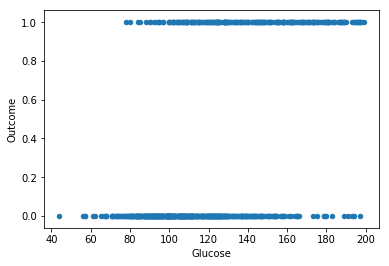

In [8]:
df_mod.plot.scatter(x='Glucose',y='Outcome')

In [9]:
df_mod.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.320000,111.016842,70.907368,20.395789,72.176842,30.974947,0.430297,31.258947
1,4.907631,142.610442,75.248996,23.441767,107.991968,35.313655,0.559594,37.341365


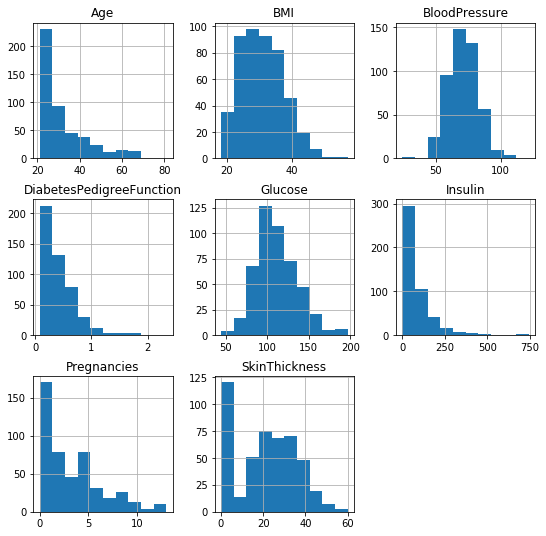

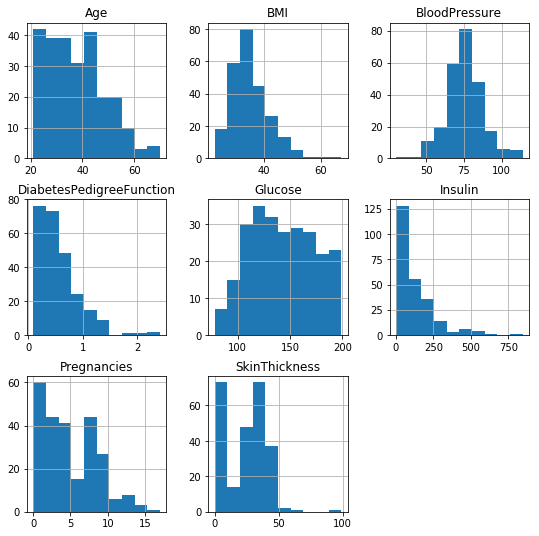

In [10]:
outcomeHist = df_mod.groupby('Outcome').hist(figsize=(9, 9))
#for ax in outcomeHist.flatten():
    #ax.set_xlabel("feature range")
    #ax.set_ylabel("Outcome number")

### Get Features and class labels into a NumPy Arrays

In [11]:
X=df_mod.loc[:, df.columns != 'Outcome'].values #we will take all the available features to predict the outcome
y=df_mod['Outcome'].values

### Splitting data

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df_mod.Outcome, random_state=0)

## Classification models

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
names = []
scores = []

## KNN

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred1 = knn.predict(X_test)
scores.append(accuracy_score(y_test, y_pred1)) #same as knn.score(X_test, y_test)
names.append('Knn')

## Adaline model via SGDClassifier

In [15]:
sgdc=SGDClassifier(max_iter=10, tol=1e-2, loss='perceptron')
sgdc.fit(X_train, y_train)
y_pred2 = sgdc.predict(X_test)
scores.append(accuracy_score(y_test, y_pred2))
names.append('Sgdc')

C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [74]:
df_models = pd.DataFrame({'Name': names, 'Score': scores})
print(df_models)

   Name     Score
0   Knn  0.729282
1  Sgdc  0.453039
2   Lgr  0.767956


## Tune hyperparameters (For KNN model)

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       119
           1       0.63      0.52      0.57        62

   micro avg       0.73      0.73      0.73       181
   macro avg       0.70      0.68      0.68       181
weighted avg       0.72      0.73      0.72       181



In [21]:
neighbors = np.arange(1,62)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
print( train_accuracy)
print( test_accuracy)

[1.         0.85082873 0.84530387 0.79926335 0.79926335 0.78084715
 0.78637201 0.77348066 0.77900552 0.77163904 0.76979742 0.76427256
 0.76979742 0.77348066 0.76243094 0.77163904 0.76979742 0.7679558
 0.76058932 0.76243094 0.76611418 0.75322284 0.7679558  0.75506446
 0.75506446 0.75506446 0.74401473 0.75138122 0.74953959 0.74953959
 0.74401473 0.75138122 0.74585635 0.75322284 0.74953959 0.75506446
 0.74769797 0.74585635 0.74401473 0.74401473 0.74217311 0.74769797
 0.74217311 0.74585635 0.74401473 0.74585635 0.74401473 0.74585635
 0.74769797 0.74217311 0.74953959 0.75322284 0.75138122 0.74953959
 0.75138122 0.75506446 0.75506446 0.75138122 0.75506446 0.75690608
 0.75138122]
[0.64640884 0.69060773 0.6961326  0.70165746 0.72928177 0.70165746
 0.71823204 0.71823204 0.74033149 0.72928177 0.74585635 0.74033149
 0.73480663 0.76243094 0.75138122 0.75690608 0.74033149 0.72928177
 0.72928177 0.72928177 0.72928177 0.73480663 0.73480663 0.73480663
 0.72928177 0.72375691 0.71823204 0.72928177 0.734

## Generate plot

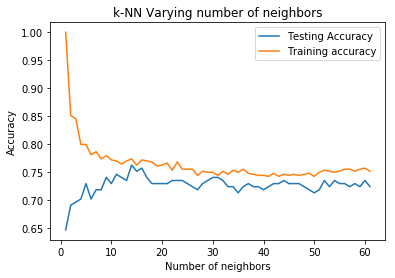

In [22]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

## Use Pipeline to combine transformers and estimators
### For KNN

In [27]:
from sklearn.pipeline import Pipeline
pipe_knn=Pipeline([('scl1',StandardScaler()),('clf1',KNeighborsClassifier(n_neighbors=3))])
knn_train=pipe_knn.fit(X_train, y_train)
knn_test=pipe_knn.fit(X_test, y_test)
print('Test Accuracy: %.3f' % pipe_knn.score(X_test, y_test))
y_pred_knn_test=pipe_knn.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred_knn_test)
print(cm1)
print(classification_report(y_test,y_pred_knn_test))

Test Accuracy: 0.867
[[111   8]
 [ 16  46]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       119
           1       0.85      0.74      0.79        62

   micro avg       0.87      0.87      0.87       181
   macro avg       0.86      0.84      0.85       181
weighted avg       0.87      0.87      0.86       181



### For Adaline model with SGDClassifier

In [67]:
pipe_lc=Pipeline([('scl2',StandardScaler()),('clf2',
linear_model.SGDClassifier(max_iter=10, tol=1e-2, loss='perceptron'))])
lc_train=pipe_lc.fit(X_train, y_train)
lc_test=pipe_lc.fit(X_test, y_test)
print('SGDClassifier Test Accuracy: %.3f' % pipe_lc.score(X_test, y_test))
y_pred_test=pipe_lc.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred_test)
print(cm2)
print(classification_report(y_test,y_pred_test))

SGDClassifier Test Accuracy: 0.773
[[103  16]
 [ 25  37]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       119
           1       0.70      0.60      0.64        62

   micro avg       0.77      0.77      0.77       181
   macro avg       0.75      0.73      0.74       181
weighted avg       0.77      0.77      0.77       181



C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


## Use k-Fold cross-validation for model selection 

In [63]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import KFold

kfold = model_selection.KFold(n_splits=10, random_state=10)
model_kfold = linear_model.SGDClassifier(max_iter=100, tol=1e-4, loss='perceptron')
results_kfold = model_selection.cross_val_score(model_kfold, X_train,
y_train, cv=kfold)
print("Adaline SGDClassifier Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Adaline SGDClassifier Accuracy: 65.21%


In [59]:
results_kfoldKnn = model_selection.cross_val_score(knn, X_train,
y_train, cv=kfold)
print("Knn Accuracy: %.2f%%" % (results_kfoldKnn.mean()*100.0))

Knn Accuracy: 72.57%


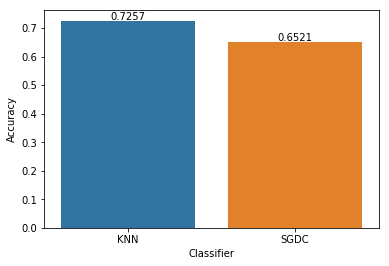

In [76]:
axis = sns.barplot(x = ['KNN','SGDC'], y = [results_kfoldKnn.mean(),results_kfold.mean()])
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

## Fine Tune kNN model via GridSearch

In [69]:
from sklearn.model_selection import GridSearchCV
param_range=np.arange(1,15)
param_grid = [{'clf1__n_neighbors': param_range}]
gd_knn=GridSearchCV(estimator=pipe_knn, param_grid=param_grid,
cv=10, n_jobs=-1)
gd_knn.fit(X_train, y_train)
print(gd_knn.best_score_)
print(gd_knn.best_params_)

0.7476979742173112
{'clf1__n_neighbors': 10}


C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Fine Tune SGDClassifier via GridSearch

In [70]:
param1_range=[0.00001, 0.0001, 0.001, 0.01, 1.0, 10.0]
param2_range=[5, 10, 15, 20, 25, 30, 40, 50, 60, 100]
param_grid = [{'clf2__max_iter': param2_range, 'clf2__tol':param1_range}]
gd=GridSearchCV(estimator=pipe_lc, param_grid=param_grid, cv=10,n_jobs=-1)
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

0.7311233885819521
{'clf2__max_iter': 40, 'clf2__tol': 0.0001}


C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


## Select the suitable algorithm with nested cross validation

In [73]:
from sklearn.model_selection import cross_val_score
scores_KNN=cross_val_score(gd_knn, X_train, y_train, scoring='accuracy', cv=2)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_KNN),
np.std(scores_KNN)))

scores_GD=cross_val_score(gd, X_train, y_train, scoring='accuracy', cv=2)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_GD),
np.std(scores_GD)))

C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CV accuracy: 0.737 +/- 0.016


C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


CV accuracy: 0.709 +/- 0.003


C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


## Fit the selected model and get the accuracy test

In [84]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train,y_train)
y_pred_knn1 = knn.predict(X_test)
print('Test Accuracy: %.3f' % knn1.score(X_test, y_test))
print(confusion_matrix(y_test,y_pred_knn1))
print(classification_report(y_test,y_pred_knn1))

Test Accuracy: 0.729
[[105  14]
 [ 36  26]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.81       119
           1       0.65      0.42      0.51        62

   micro avg       0.72      0.72      0.72       181
   macro avg       0.70      0.65      0.66       181
weighted avg       0.71      0.72      0.71       181

